<center>
<img src="https://wpsovet.ru/wp-content/uploads/1/6/4/1642a836ada1355f35ef577d9024a728.jpg" width="700"> 

# Андан на экономе: домашнее задание 2
</center>

**ФИО:** Мамонтова Дарья Андреевна

**id из контеста:** -




In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_prices = pd.read_csv('price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices.head()

(2518, 521)


,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2013-03-05 00:00:00,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
1,2013-03-06 00:00:00,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2,2013-03-07 00:00:00,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
3,2013-03-08 00:00:00,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
4,2013-03-11 00:00:00,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


In [3]:
df_inf = pd.read_csv('information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


## 1.1 Разогреваемся

__а) [0 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [4]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.set_index('Date')

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-05,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,63.810726,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
2013-03-06,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,64.217216,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2013-03-07,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,64.349945,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
2013-03-08,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,64.997017,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
2013-03-11,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,64.955536,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,142.179993,15.630000,140.630005,147.919998,154.279999,156.630005,123.529999,99.769997,69.209999,266.250000,...,110.550003,34.549999,102.550003,126.570000,123.300003,296.230011,50.389999,73.720001,131.839996,165.470001
2023-02-28,141.970001,15.980000,144.960007,147.410004,153.899994,155.559998,123.279999,101.720001,70.000000,265.549988,...,109.910004,38.070000,102.650002,127.160004,123.870003,300.250000,50.619999,74.589996,131.149994,167.000000
2023-03-01,137.509995,16.030001,138.820007,145.309998,155.270004,156.509995,120.830002,100.830002,70.970001,263.589996,...,110.889999,37.360001,101.089996,126.199997,122.080002,302.339996,50.439999,69.620003,128.440002,167.570007


__б) [5 баллов]__ В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [5]:
l = df_inf['NASDAQ'].value_counts()[True]
print(f'{l} ценные бумаги входили в индекс NASDAQ')

103 ценные бумаги входили в индекс NASDAQ


Сколько ценных бумаг входят во все три индекса сразу?

In [6]:
df_1= df_inf[(df_inf['NASDAQ']== True) &(df_inf['S&P-500']== True)&(df_inf['DJI']==True)].shape[0]
print(f'{df_1} ценных бумаг входят во все три индекса сразу')

5 ценных бумаг входят во все три индекса сразу


В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [7]:
df_l = df_inf[df_inf['S&P-500'] == True]
df_f = df_l[(df_l['Founded']>=1800)&(df_l['Founded']<1900)].shape[0]
print(f'{df_f} компаний из индекса S&P-500 были основаны в 19 веке')

95 компаний из индекса S&P-500 были основаны в 19 веке


В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [8]:
vs = df_inf['GICS Sector'].unique()
print(f'Всего {len(vs)} уникальных секторов, представленных в данных')

Всего 12 уникальных секторов, представленных в данных


Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров? 

In [9]:
c = set(df_inf['Symbol'].unique())
g = set(list(df_prices))
it = len(g-c)
print(f'{it} тикеров попали в таблицу с ценами, но не попали в таблицу с информацией')

59 тикеров попали в таблицу с ценами, но не попали в таблицу с информацией


__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

In [10]:
df_inf.groupby('GICS Sector').size() #найдём самые крупные сектора экономики

GICS Sector
Communication Services    26
Consumer Discretionary    61
Consumer Staples          33
Energy                    26
Financials                66
Health Care               62
Industrials               73
Information Technology    71
Materials                 28
Real Estate               31
Utilities                 28
dtype: int64

In [11]:
#Посчитаем,сколько компаний из индекса S&P-500 в сумме приходится на  3 самых крупных сектора
df_l = df_inf[df_inf['S&P-500']== True]
dff = df_l[(df_l['GICS Sector']=='Industrials')|(df_l['GICS Sector']=='Information Technology')|(df_l['GICS Sector']=='Financials')].shape[0]
print(f'{dff} компаний из индекса S&P-500 в сумме приходится на  3 самых крупных сектора')

210 компаний из индекса S&P-500 в сумме приходится на  3 самых крупных сектора


__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

__Ответ:__Ниже под графиками

Text(0.5, 0, 'День торгов по счёту')

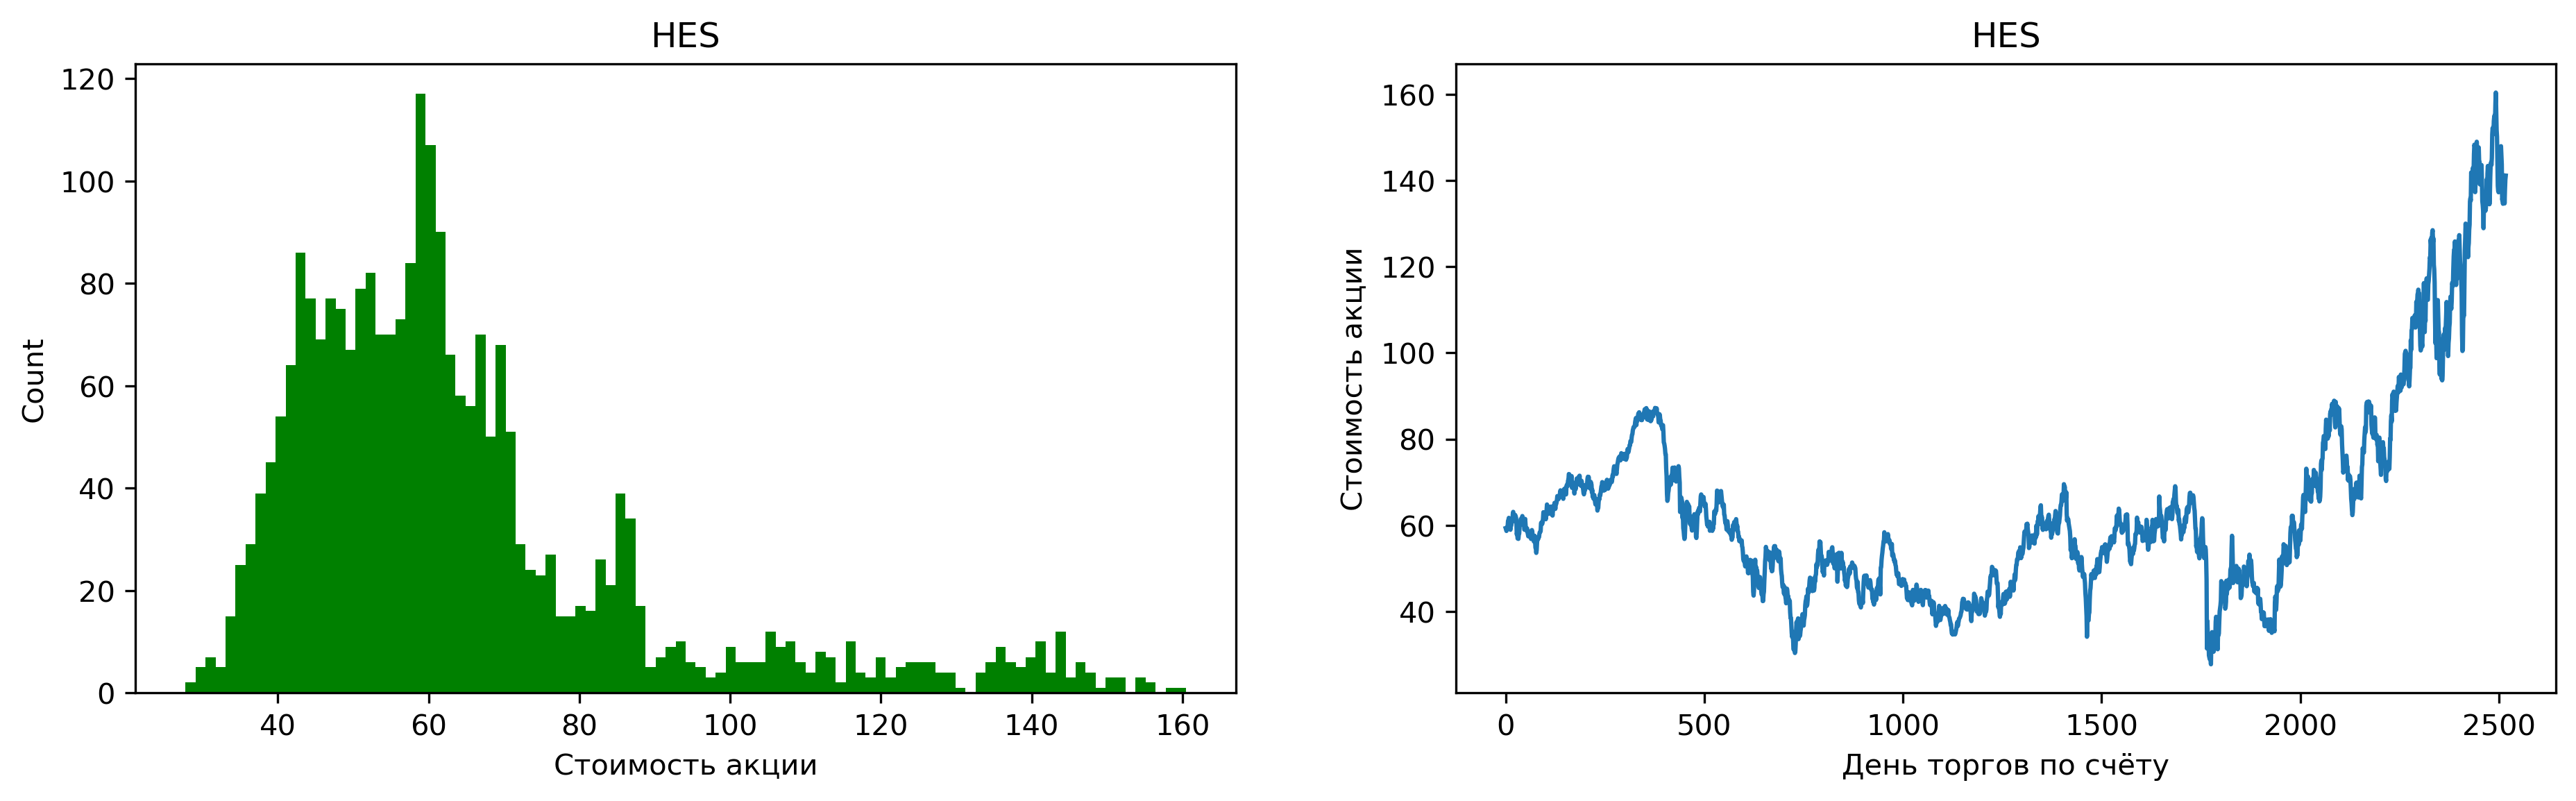

In [12]:
np.random.seed(19)
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=300)
df = df_prices.sample(axis = 1,replace=False)
c = np.mean(df,axis=1)
axs[0].set_title(list(df)[0])
axs[0].hist(df,bins = 100,color = 'green')
axs[0].set_ylabel("Count")
axs[0].set_xlabel("Стоимость акции")
axs[1].set_title(list(df)[0])
axs[1].plot(c)
axs[1].set_ylabel("Стоимость акции")
axs[1].set_xlabel("День торгов по счёту")

Text(0.5, 0, 'День торгов по счёту')

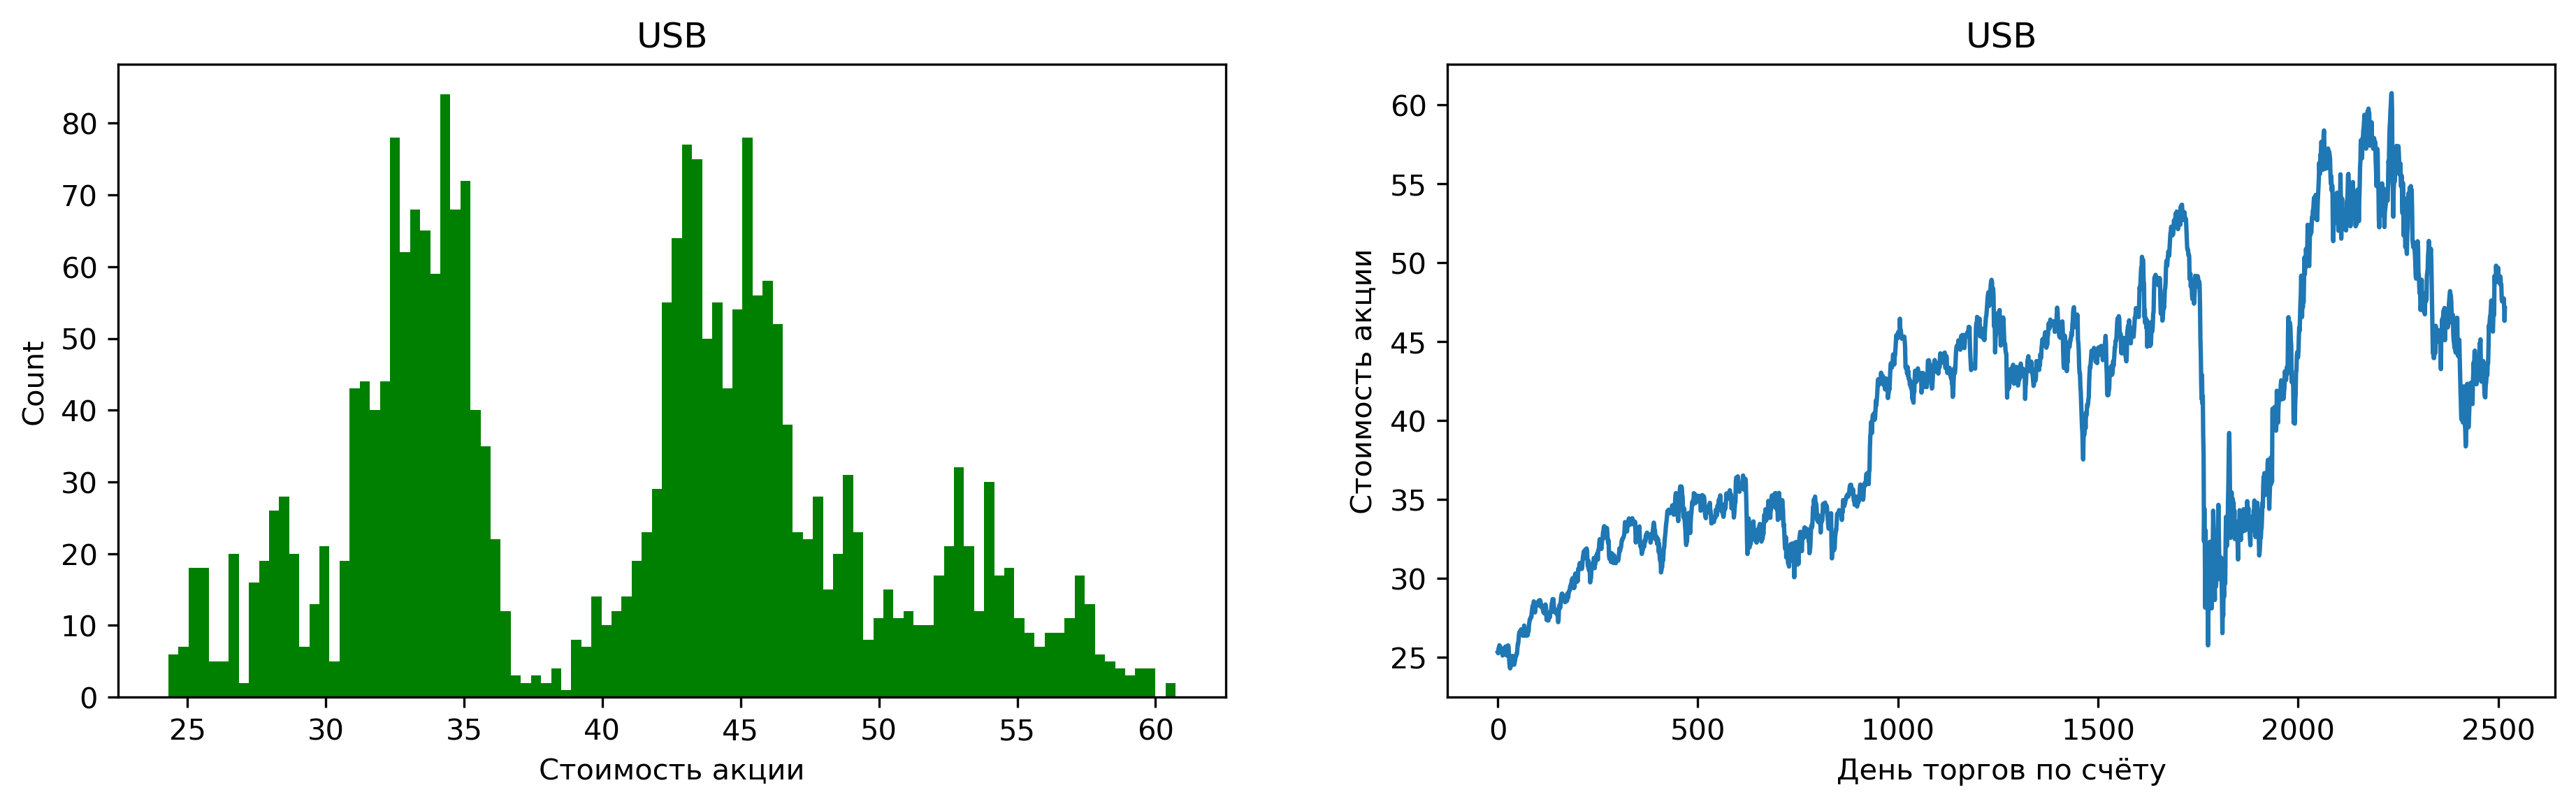

In [13]:
np.random.seed(15)
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=300)
df = df_prices.sample(axis = 1,replace = False)
c = np.mean(df,axis=1)
axs[0].set_title(list(df)[0])
axs[0].hist(df,bins = 100,color = 'green')
axs[0].set_ylabel("Count")
axs[0].set_xlabel("Стоимость акции")
axs[1].set_title(list(df)[0])
axs[1].plot(c)
axs[1].set_ylabel("Стоимость акции")
axs[1].set_xlabel("День торгов по счёту")

Text(0.5, 0, 'День торгов по счёту')

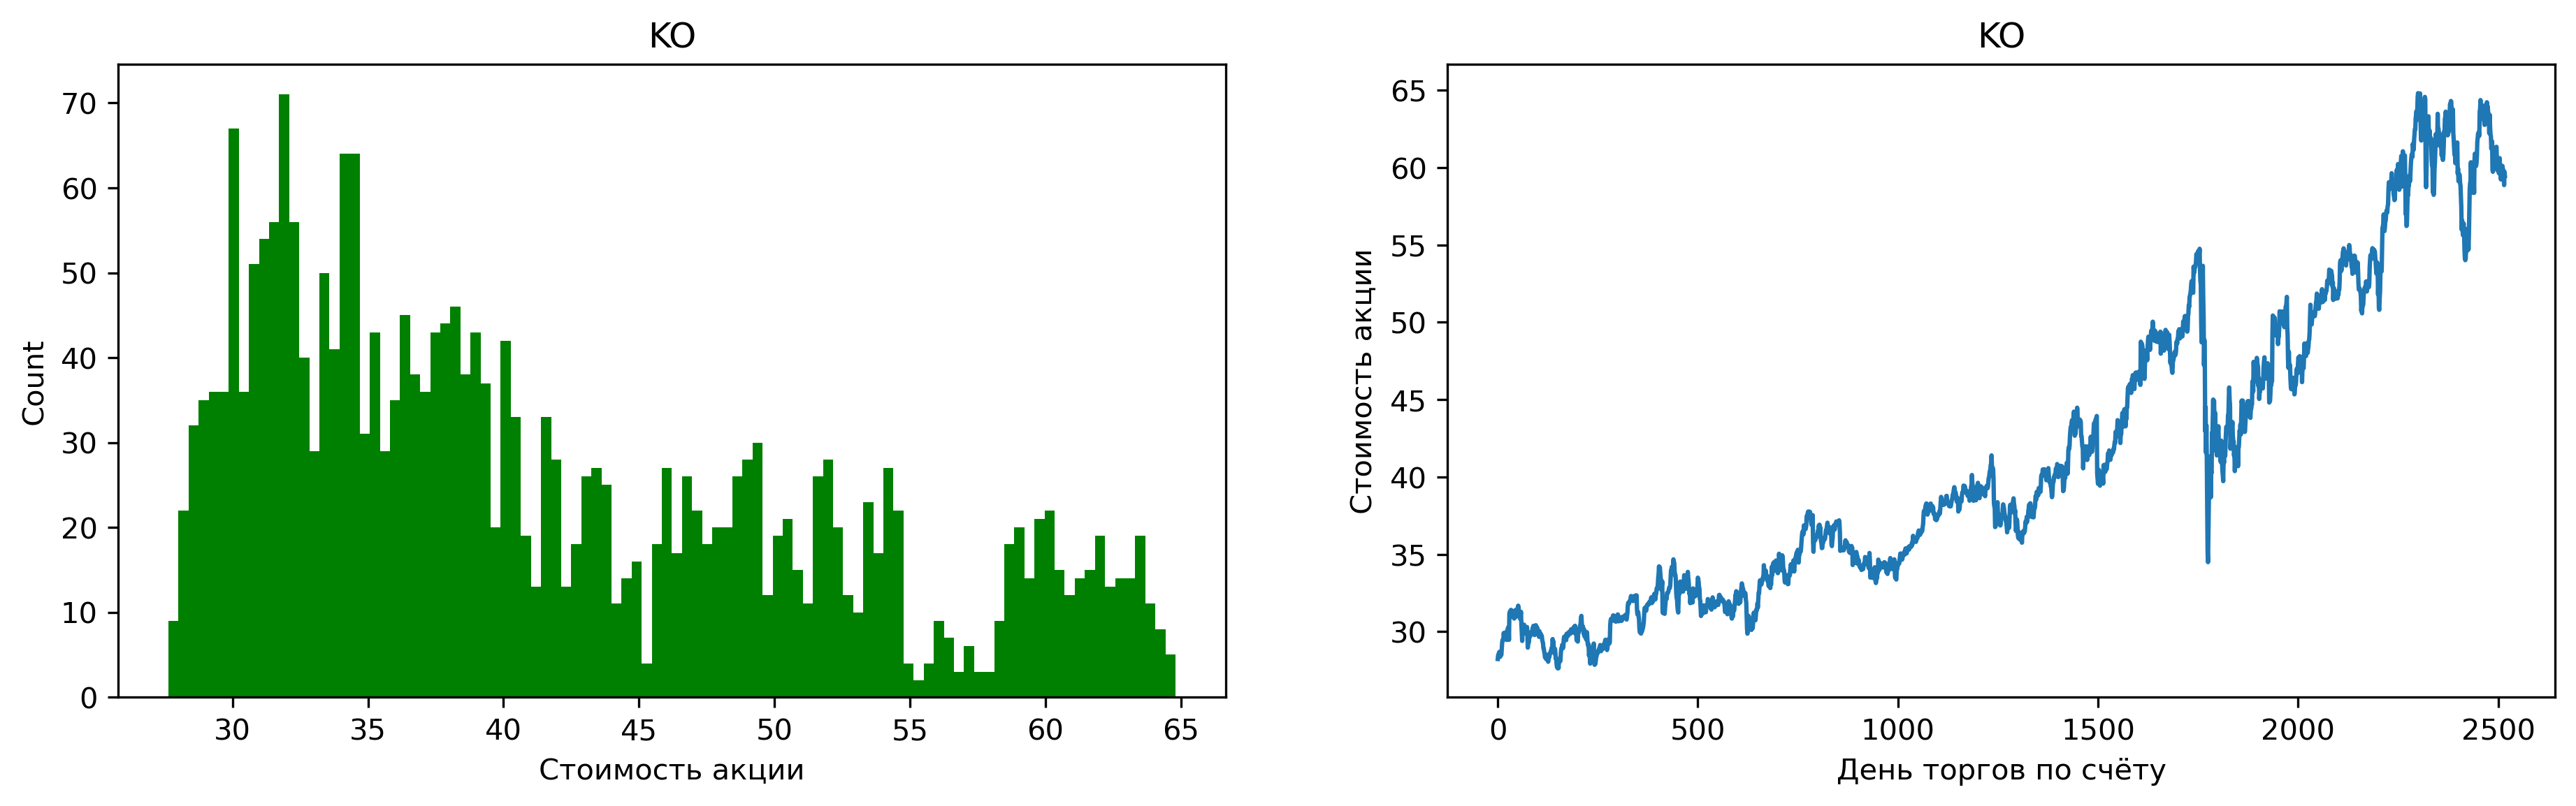

In [14]:
np.random.seed(1)
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=300)
df = df_prices.sample(axis = 1,replace = False)
c = np.mean(df,axis=1)
axs[0].set_title(list(df)[0])
axs[0].hist(df,bins = 100,color = 'green')
axs[0].set_ylabel("Count")
axs[0].set_xlabel("Стоимость акции")
axs[1].set_title(list(df)[0])
axs[1].plot(c)
axs[1].set_ylabel("Стоимость акции")
axs[1].set_xlabel("День торгов по счёту")

Text(0.5, 0, 'День торгов по счёту')

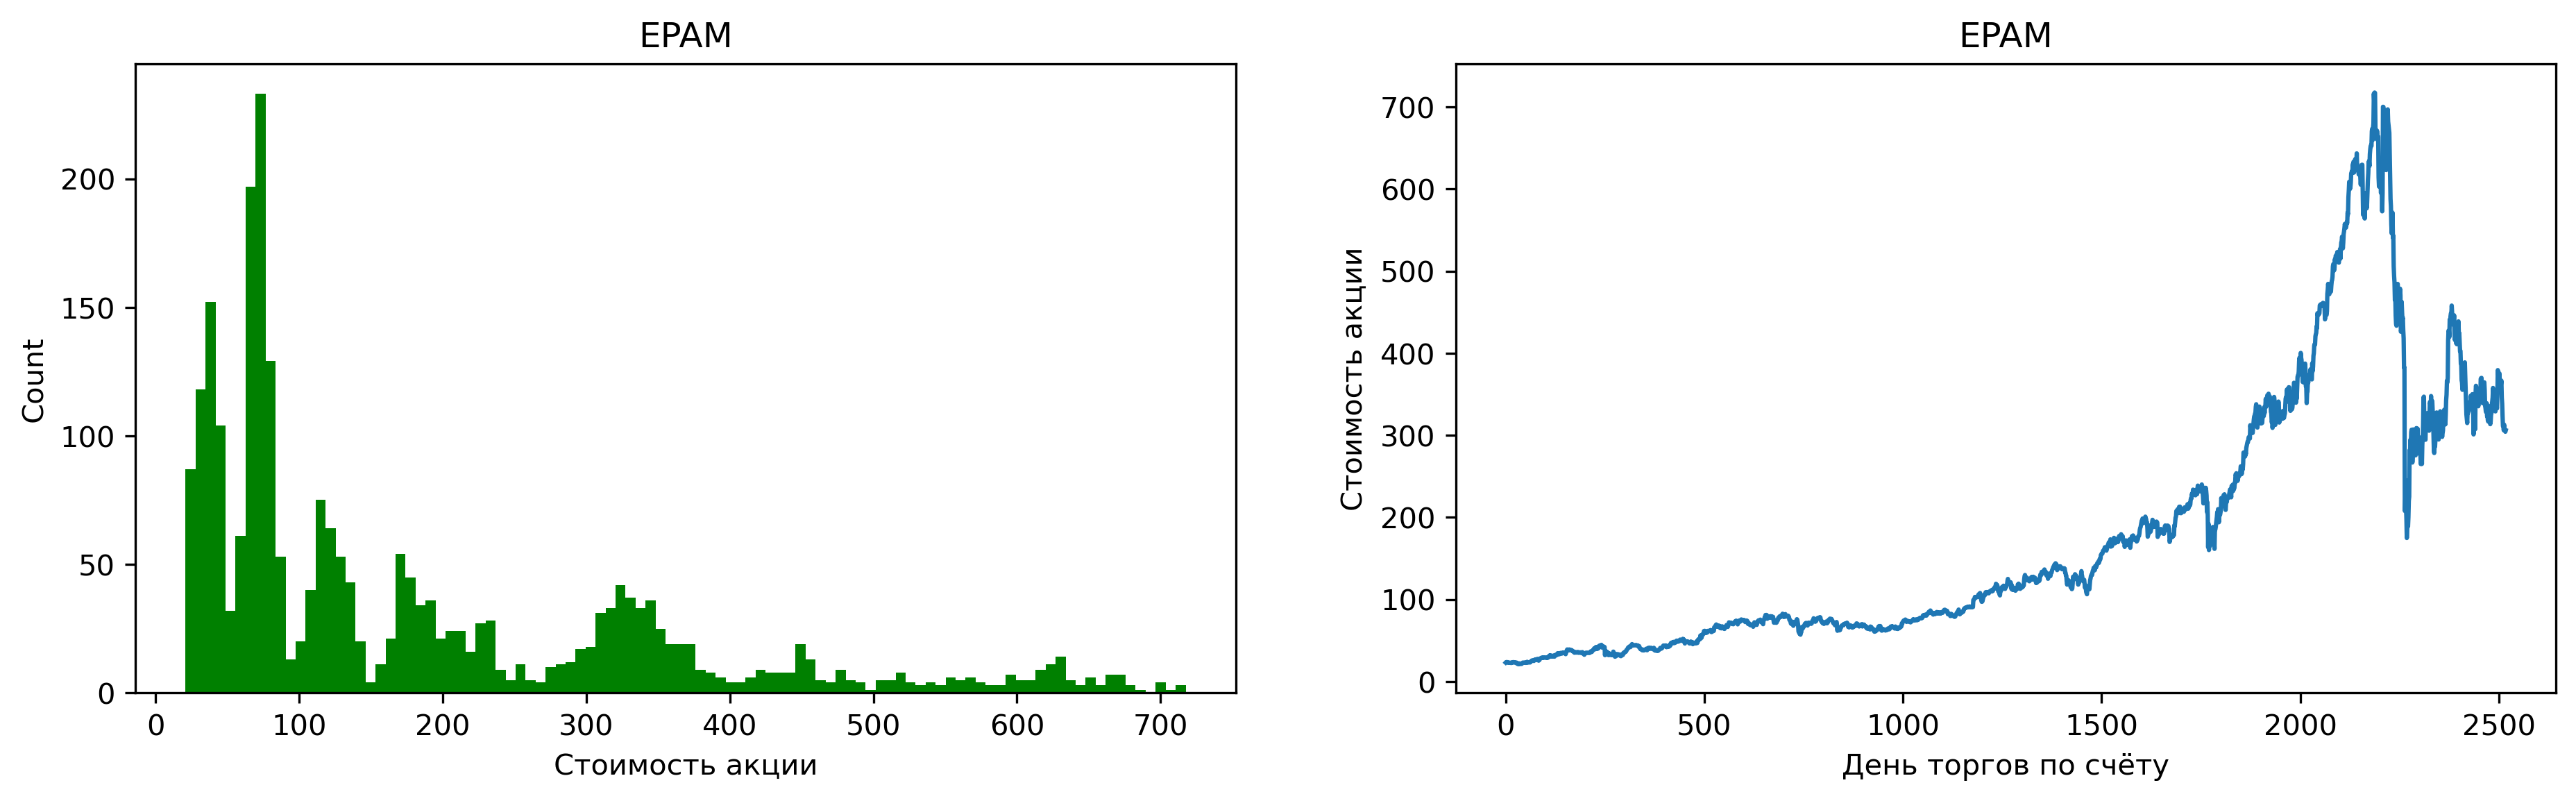

In [15]:
np.random.seed(23)
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=300)
df = df_prices.sample(axis = 1,replace = False)
c = np.mean(df,axis=1)
axs[0].set_title(list(df)[0])
axs[0].hist(df,bins = 100,color = 'green')
axs[0].set_ylabel("Count")
axs[0].set_xlabel("Стоимость акции")
axs[1].set_title(list(df)[0])
axs[1].plot(c)
axs[1].set_ylabel("Стоимость акции")
axs[1].set_xlabel("День торгов по счёту")

Text(0.5, 0, 'День торгов по счёту')

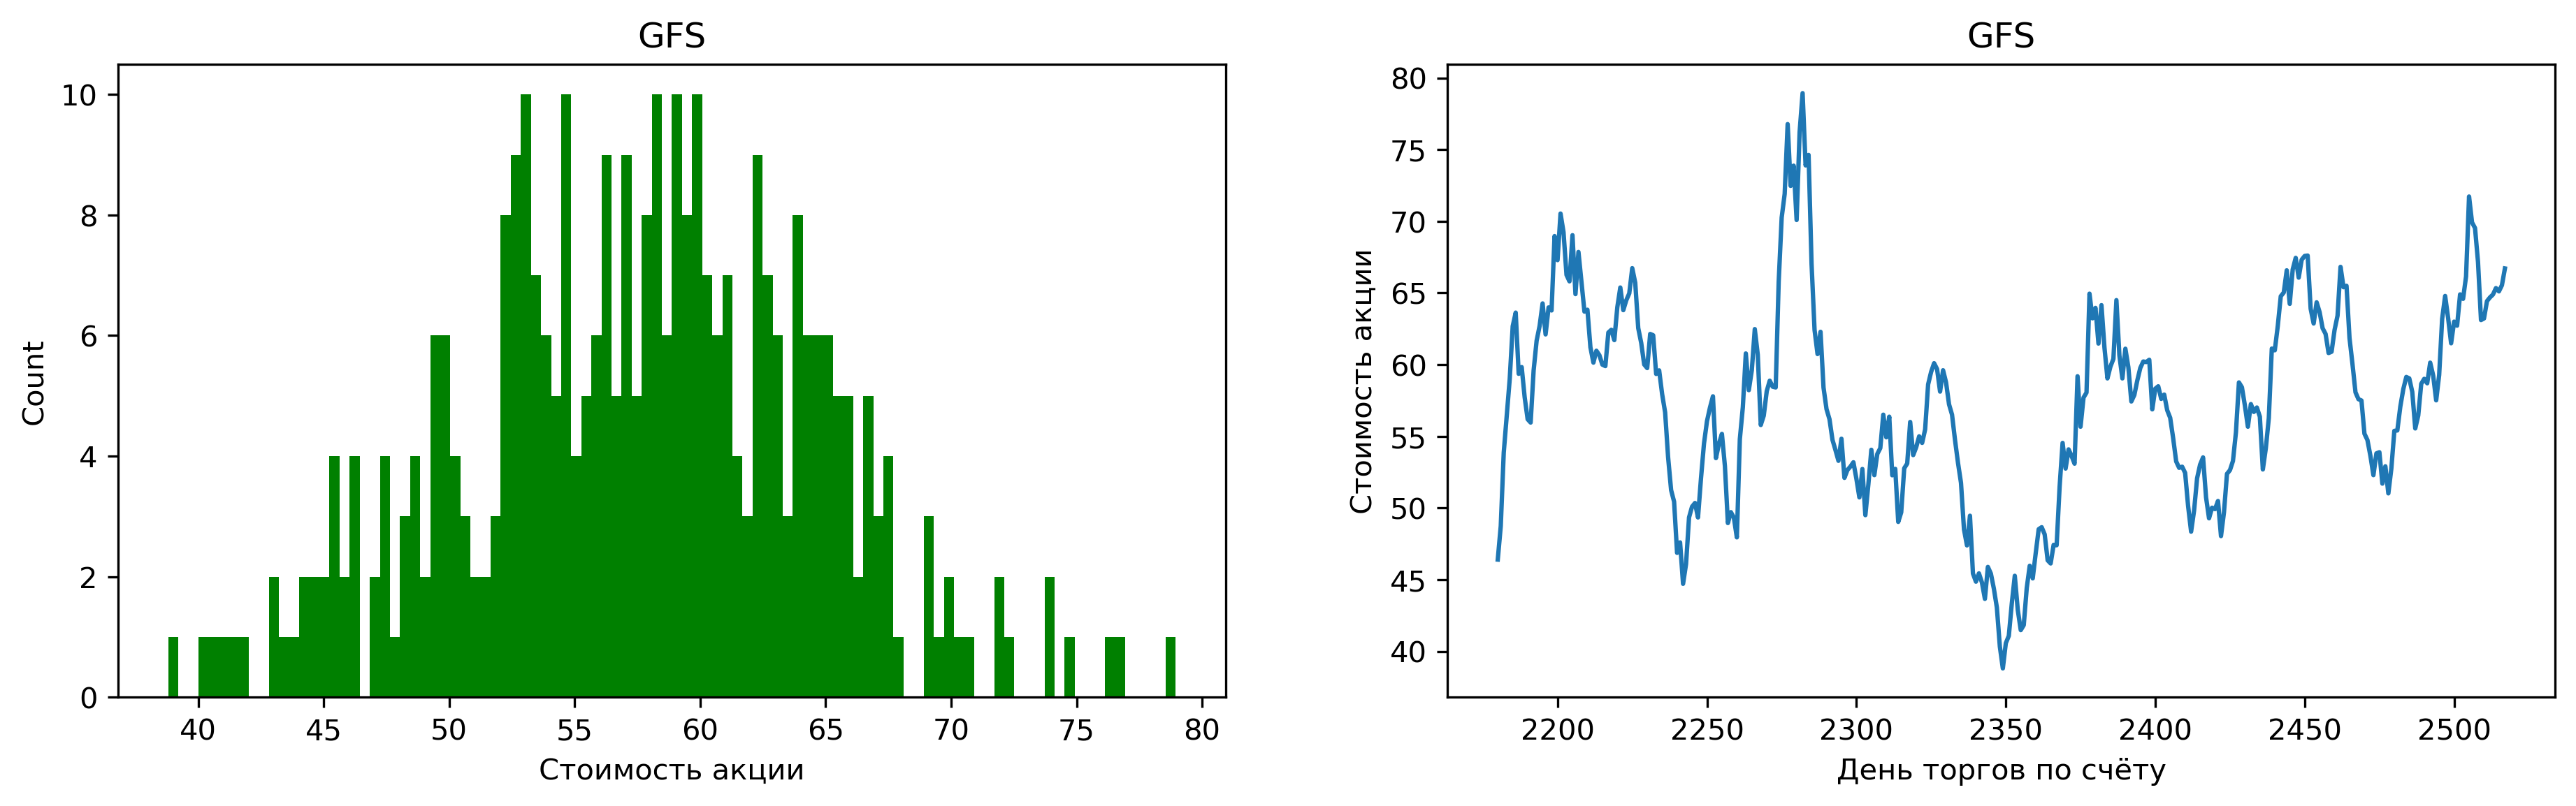

In [16]:
np.random.seed(190)
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=300)
df = df_prices.sample(axis = 1,replace=False)
c = np.mean(df,axis=1)
axs[0].set_title(list(df)[0])
axs[0].hist(df,bins = 100,color = 'green')
axs[0].set_ylabel("Count")
axs[0].set_xlabel("Стоимость акции")
axs[1].set_title(list(df)[0])
axs[1].plot(c)
axs[1].set_ylabel("Стоимость акции")
axs[1].set_xlabel("День торгов по счёту")

- #### Как мы можем увидеть, распределения стоимости акций не особо похоже на нормальное. В среднем, на финансовых рынках за последние 10 лет стоимости акций росли, однако, были и кризисные периоды: это мы можем увидеть по "провалам" в ценах акций на графиках динамики.

__д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

In [17]:
# Создадим датафрейм за прошедший (2022) год
df_p = df_prices[(df_prices['Date']>='2022-01-01')&(df_prices['Date']<='2022-12-31')]
df_p = df_p.reset_index(drop=True)
df_p.head()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2022-01-03,155.457184,18.750000,228.551392,180.683868,129.114410,130.573669,172.679993,136.128998,44.549999,...,60.648853,56.082115,115.033981,133.341415,124.332085,583.900024,62.032288,184.259995,301.829987,231.780838
1,2022-01-04,150.201767,19.020000,228.812012,178.390701,128.866531,129.333115,170.800003,132.927475,45.130001,...,62.930111,56.367996,116.254295,134.054382,125.593407,587.599976,63.799397,179.850006,281.579987,222.956467
2,2022-01-05,147.628708,18.680000,228.232864,173.645538,129.543472,130.455521,162.250000,132.330261,44.599998,...,63.712791,55.461060,114.669853,132.355026,125.179390,558.179993,63.944244,174.880005,262.329987,214.478729
3,2022-01-06,148.145279,18.570000,233.252151,170.746811,128.933273,128.437164,159.750000,132.310638,44.860001,...,65.211357,55.421631,114.512405,133.722336,124.139511,555.159973,66.570763,176.330002,260.209991,215.330475
4,2022-01-07,144.201218,19.280001,229.815872,170.915573,128.599564,131.065964,166.050003,132.721863,45.070000,...,65.745872,55.599075,113.597160,132.188995,123.388496,530.859985,67.681244,171.600006,261.529999,209.061295


In [18]:
al = pd.DataFrame(df_p.median())
al['index'] = al.index
al.set_index('index')
al = al.rename(columns = {'index':'Symbol',0:'median_price'})
al

C:\Users\user\AppData\Local\Temp/ipykernel_17572/1198554444.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  al = pd.DataFrame(df_p.median())


,median_price,Symbol
A,132.094055,A
AAL,14.500000,AAL
AAP,185.792175,AAP
AAPL,153.387222,AAPL
ABBV,144.825607,ABBV
...,...,...
ZBRA,325.369995,ZBRA
ZION,54.170490,ZION
ZM,103.180000,ZM
ZS,163.419998,ZS


In [19]:
df_inf = df_inf.merge(al,on ='Symbol',how='left')
df_inf.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI,median_price
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False,132.094055
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False,14.500000
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False,185.792175
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True,153.387222
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False,144.825607


In [20]:
df_inf[['GICS Sector','median_price']].groupby('GICS Sector').quantile(0.95)

,median_price
GICS Sector,
Communication Services,260.027003
Consumer Discretionary,1760.140015
Consumer Staples,246.914078
Energy,159.902217
Financials,354.431122
Health Care,523.427579
Industrials,427.725174
Information Technology,419.005197
Materials,284.315181


## 1.2 Риск и доходность

__е) [5 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [21]:
df_prices = df_prices.set_index('Date')

In [22]:
df_r = df_prices.diff()/df_prices.shift(1)
df_r = df_r.drop('2013-03-05',axis=0)
df_r.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533


Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 

__Ответ:__ **Доходности по акциям визуально похожи на нормальное распределение(из гистограмм). Да, по ящику с усами видно, что выбросы есть: это точки, не входящие в пределы самого цветного "ящика".**

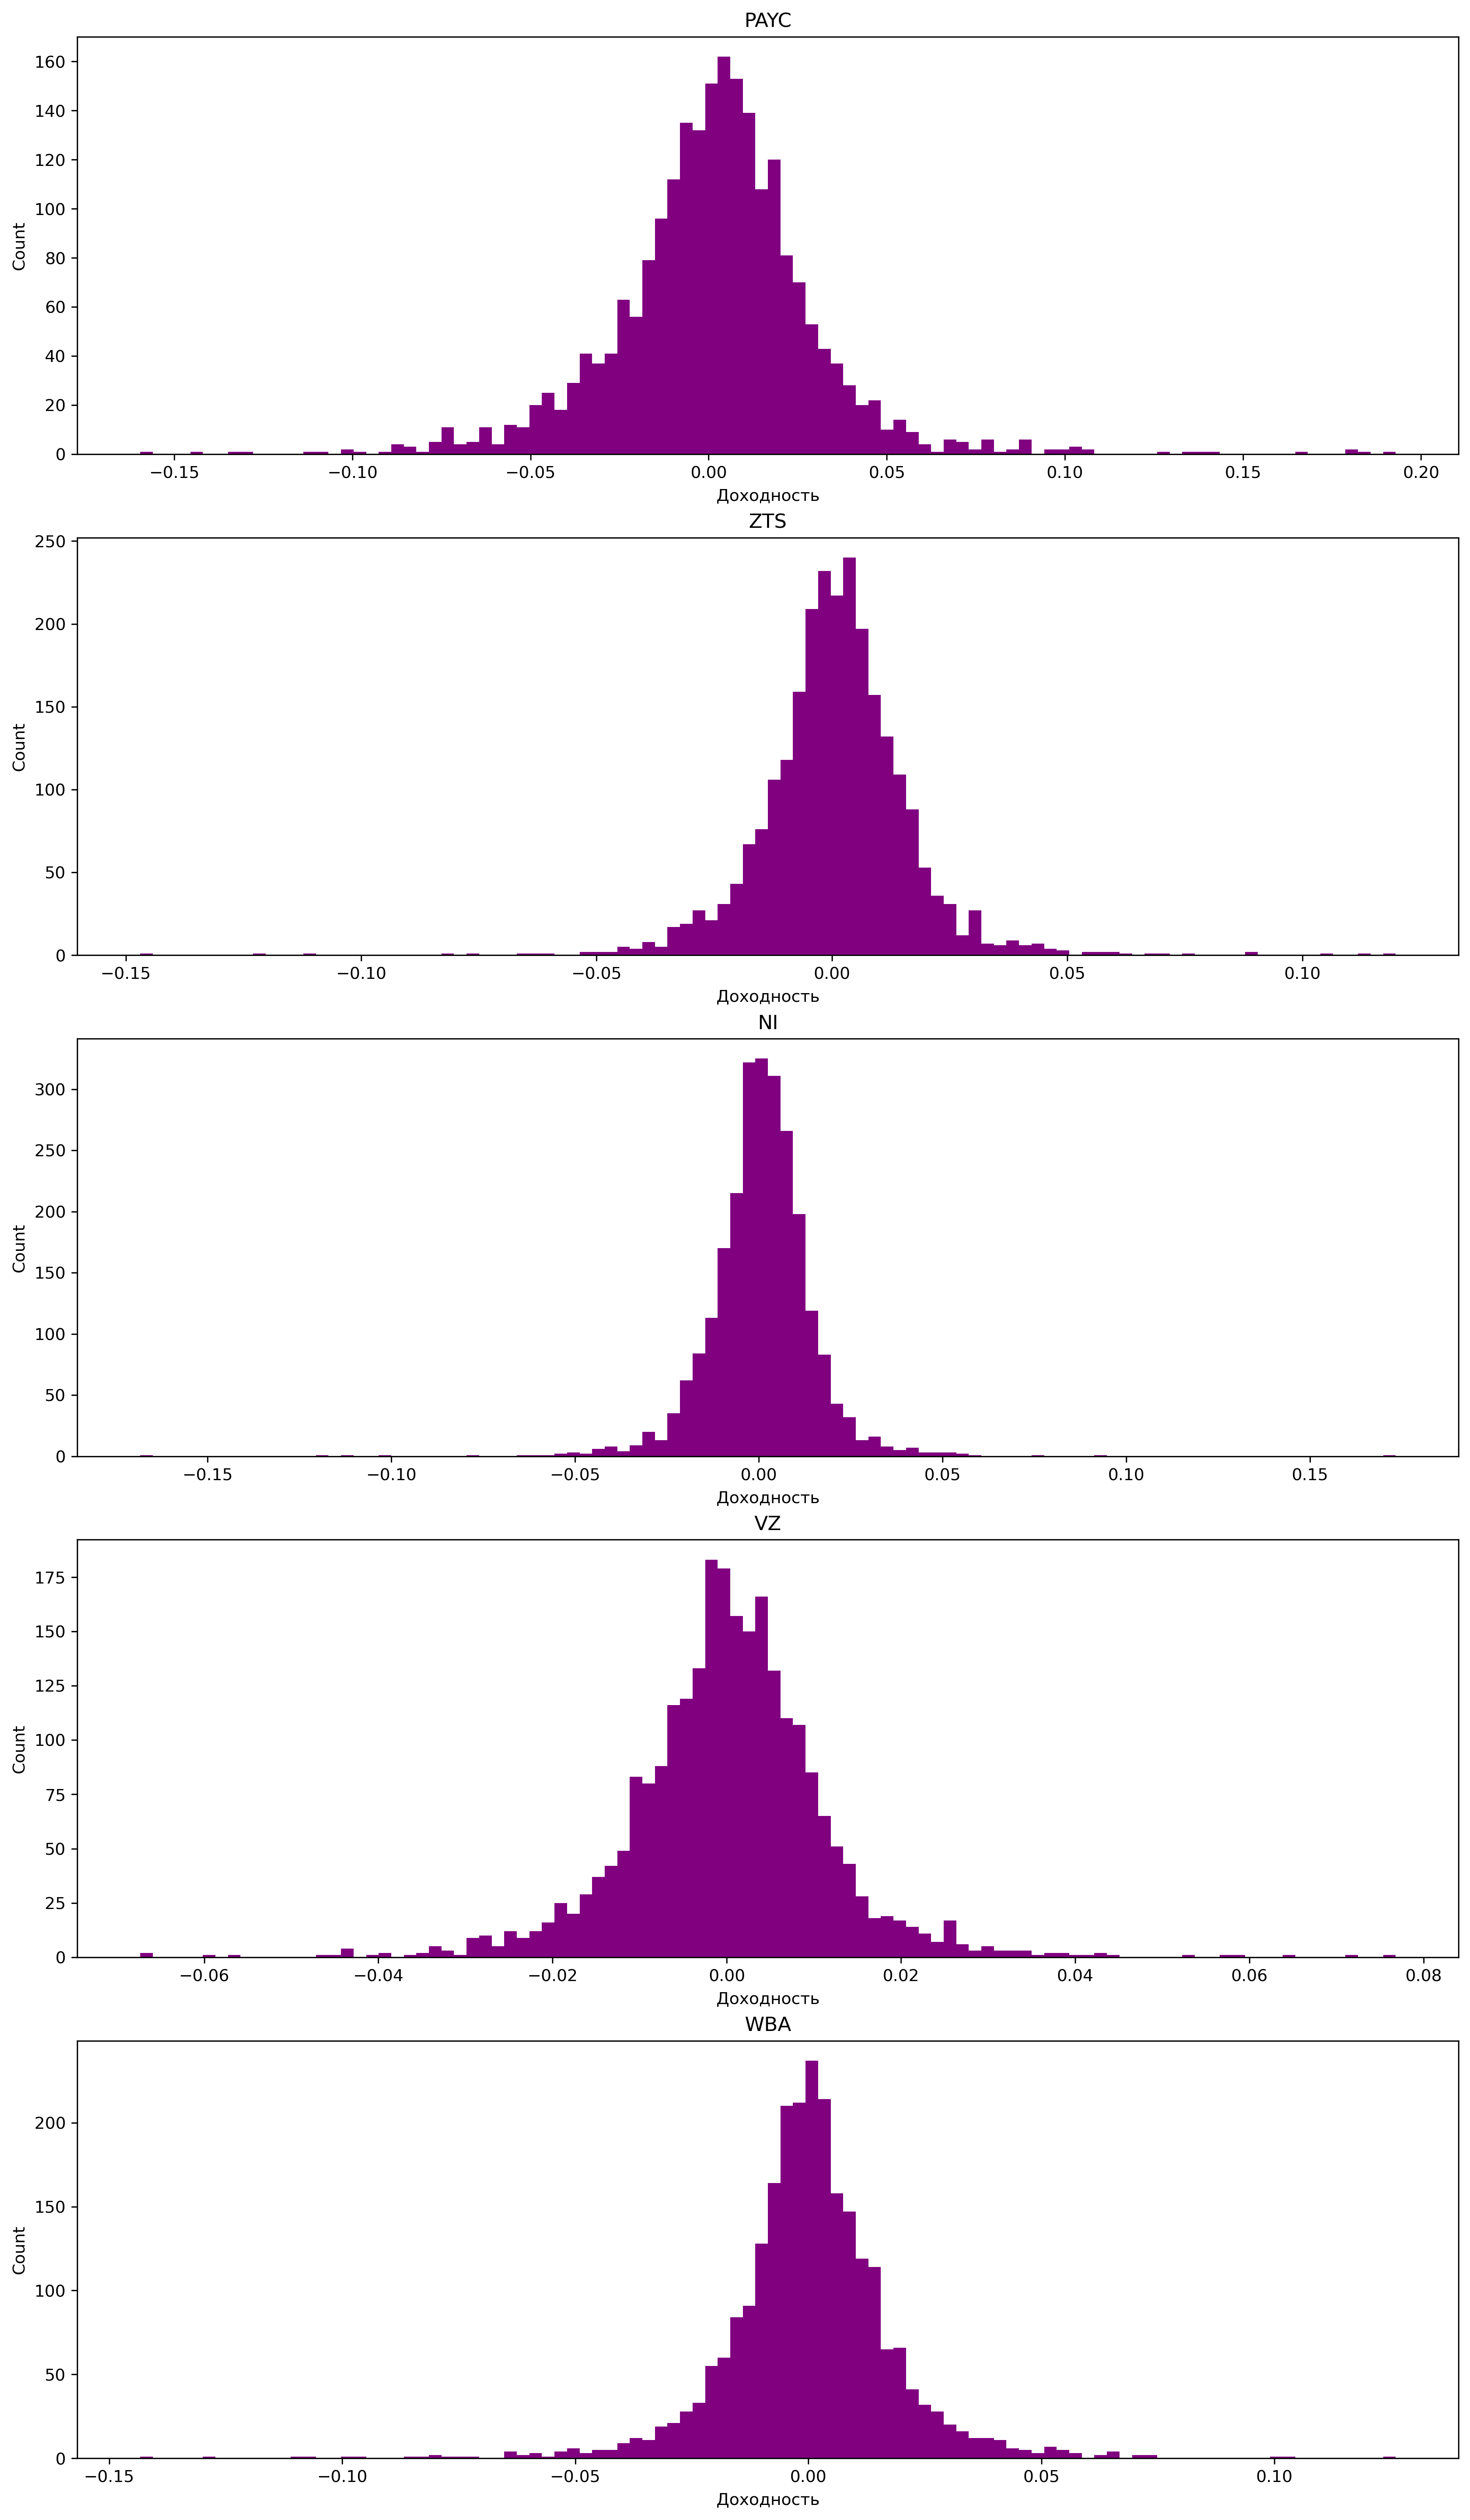

In [23]:
#построим гистограммы доходностей для 5 случайно выбранных тикеров
np.random.seed(190)
fig, axs = plt.subplots(5,figsize=(15, 27), dpi=300)
df_1 = df_r.sample(n = 5,axis = 1,replace=False)
for i in range(len(df_1.columns)):
    axs[i].set_title(list(df_1)[i])
    axs[i].hist(df_1.iloc[:,i],bins = 100,color = 'purple')
    axs[i].set_ylabel("Count")
    axs[i].set_xlabel("Доходность")

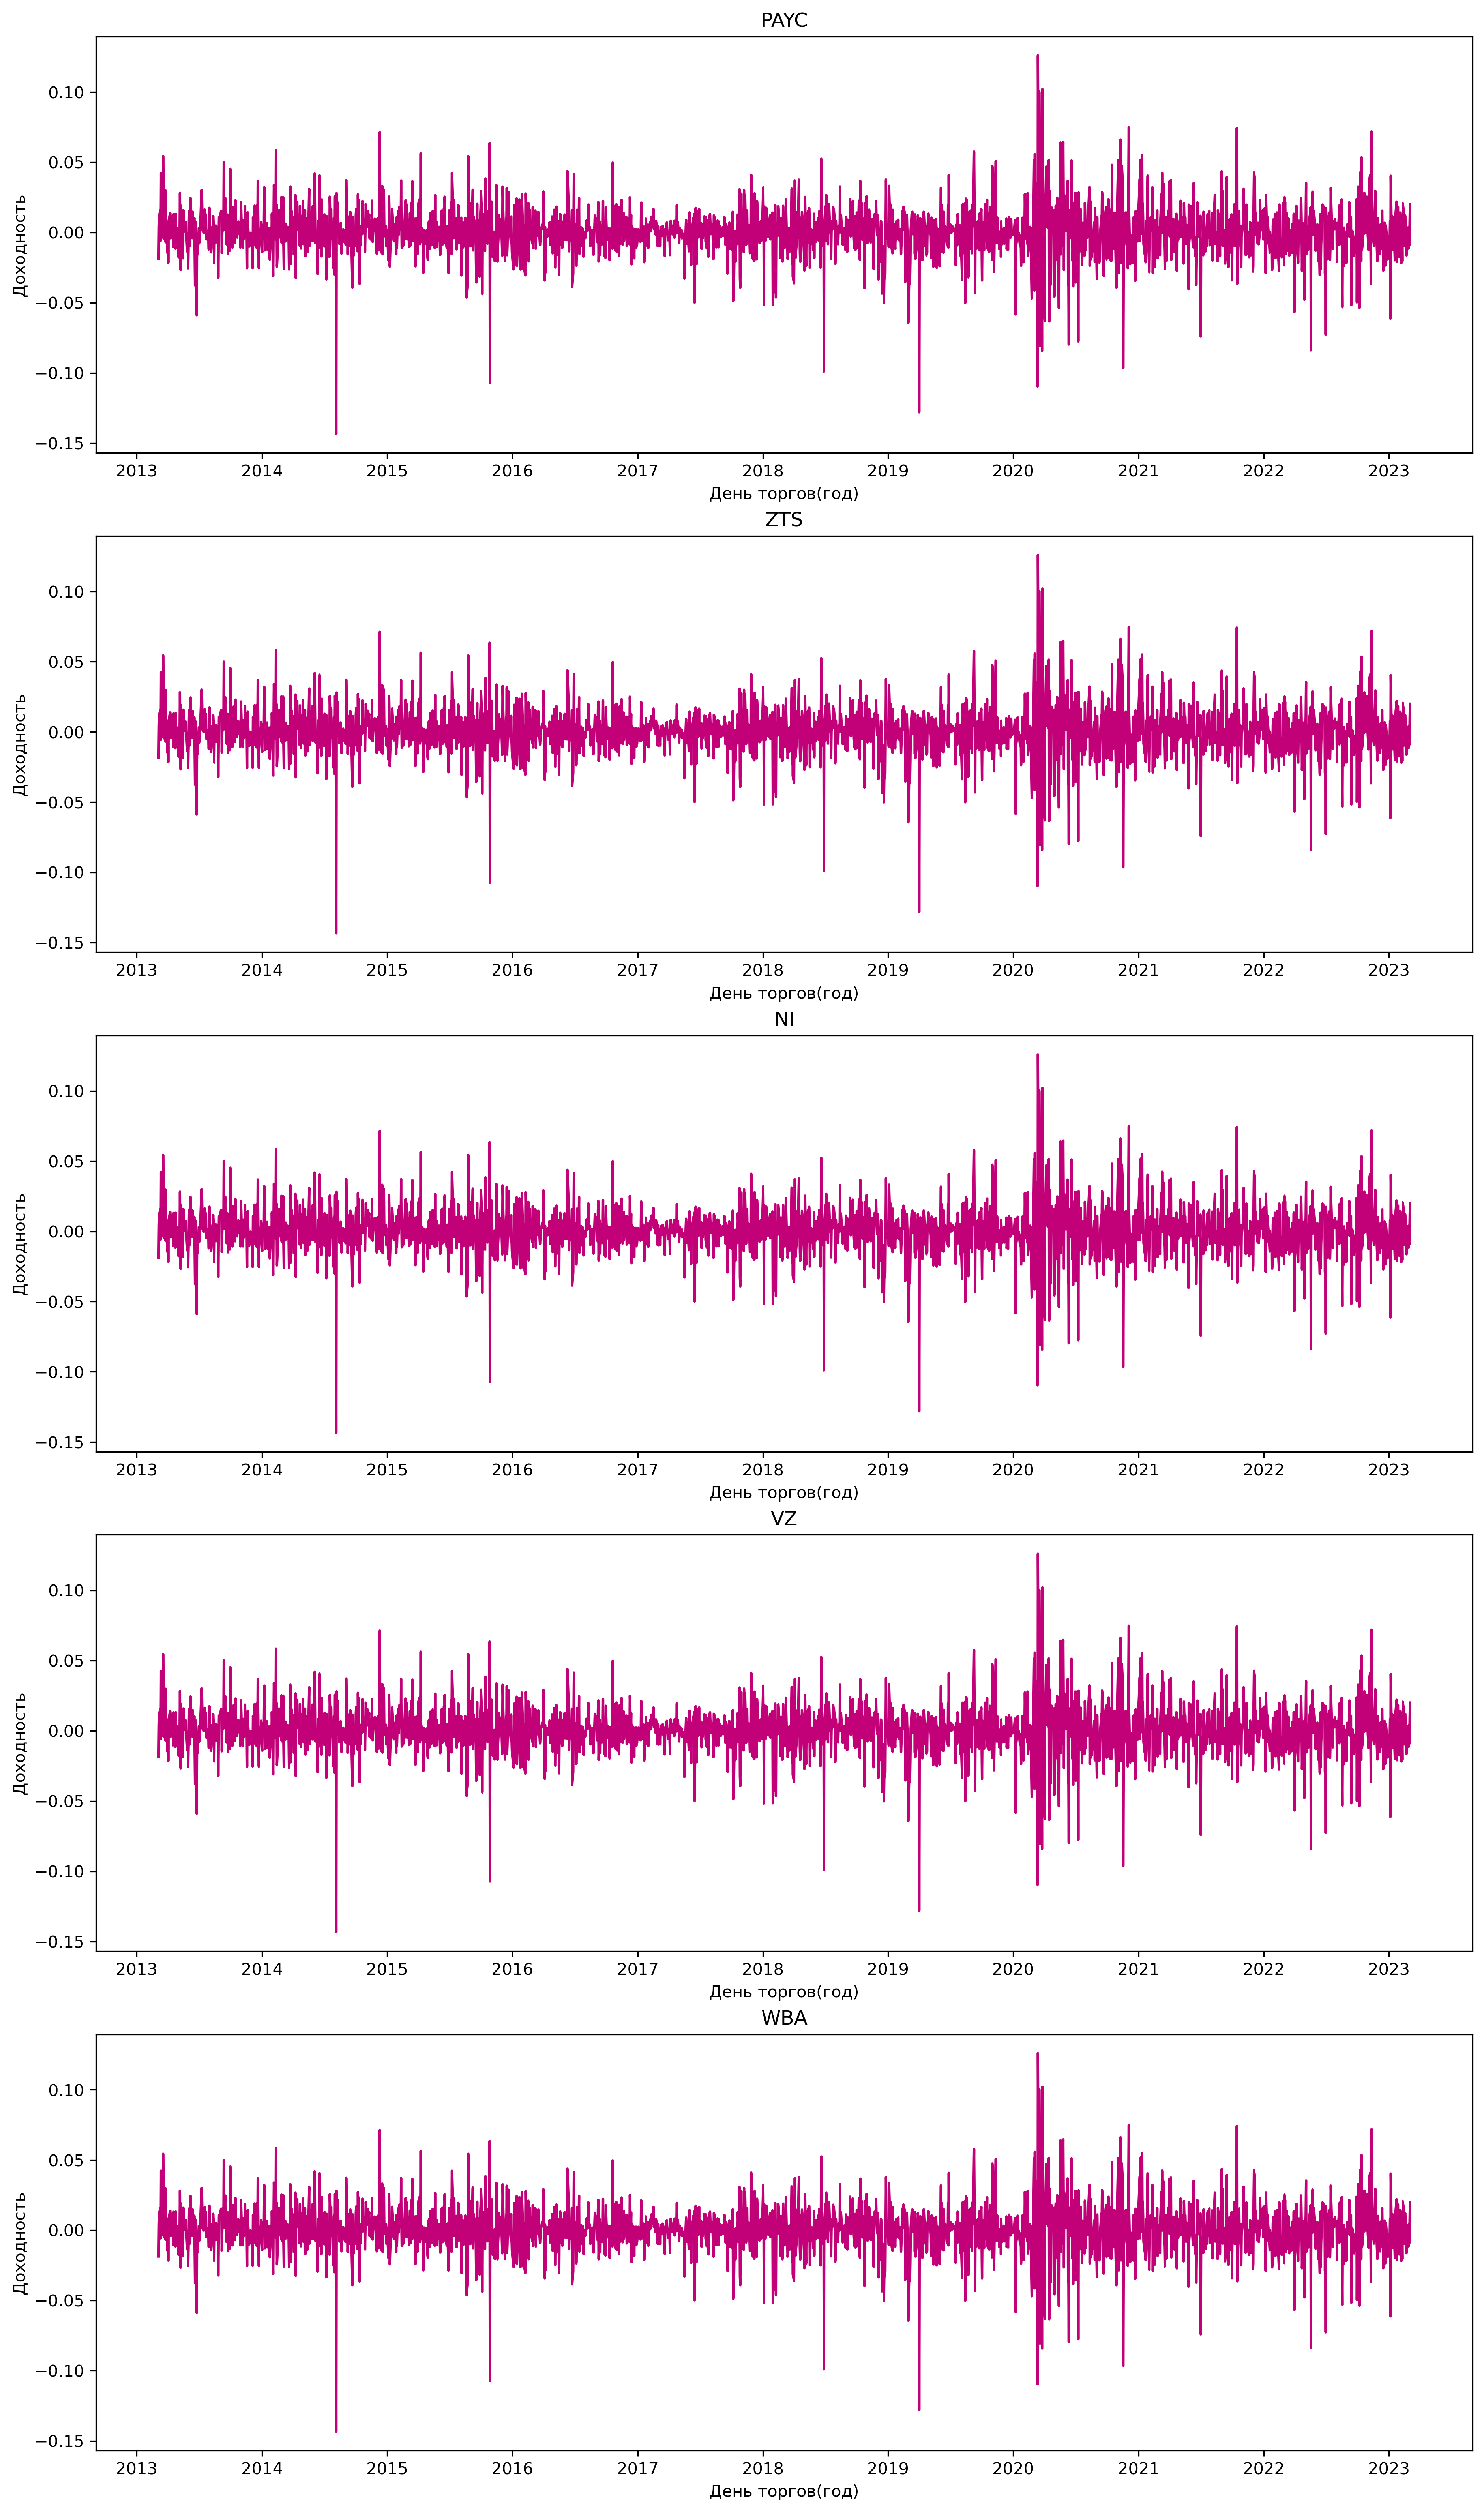

In [24]:
#построим графики динамики доходностей для 5 случайно выбранных тикеров
np.random.seed(190)
fig, axs = plt.subplots(5,figsize=(15, 27), dpi=300)
df_1 = df_r.sample(n = 5,axis = 1,replace=False)
t = df_r.index
for j in range(len(df_1.columns)):
    axs[j].set_title(list(df_1)[j])
    axs[j].plot(t,df_1.iloc[:,i],color = '#C20078')
    axs[j].set_ylabel("Доходность")
    axs[j].set_xlabel("День торгов(год)")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


[Text(0.5, 0, 'Название тикера'),
 Text(0, 0.5, 'Доходность'),
 Text(0.5, 1.0, 'Ящик с усами тикер акции/его доходность')]

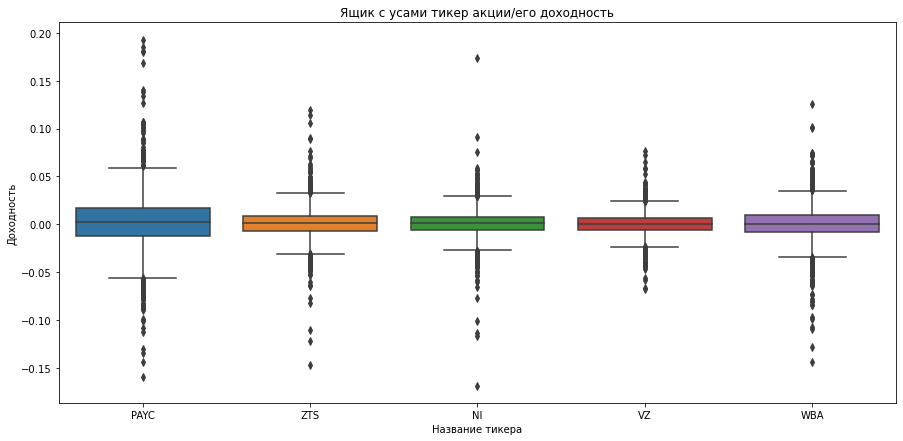

In [25]:
#ну и ящик с усами для 5 случайно выбранных тикеров
plt.figure(figsize=(15,7))
ag = sns.boxplot(data=df_1)
ag.set(xlabel = 'Название тикера',ylabel = 'Доходность',title = 'Ящик с усами тикер акции/его доходность')

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону. 

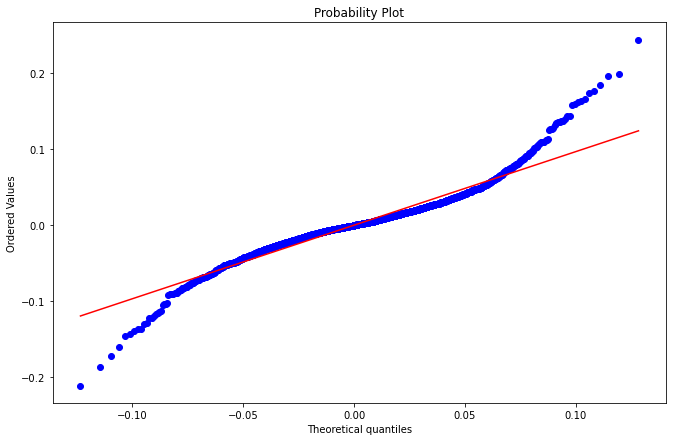

In [26]:
plt.figure(figsize=(11,7))
ax = plt.subplot(111)
x = df_r['TSLA'].values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [27]:
df_train = df_r[df_r.index  < '2022-03-03']
df_test = df_r[df_r.index  >= '2022-03-03']

__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [28]:
R = df_train.mean().sort_values(ascending=False)
R

CEG     0.006477
LCID    0.004682
MRNA    0.003882
GFS     0.003782
DDOG    0.003149
          ...   
IBM     0.000060
GE      0.000021
KHC    -0.000037
VTRS   -0.000168
RIVN   -0.005722
Length: 520, dtype: float64

In [29]:
#Найдём 10 самых доходный компаний
R[0:10]

CEG     0.006477
LCID    0.004682
MRNA    0.003882
GFS     0.003782
DDOG    0.003149
CARR    0.003140
ENPH    0.002918
ZS      0.002762
TSLA    0.002746
CRWD    0.002606
dtype: float64

In [30]:
#Теперь 10 самых убыточных компаний
R_new = df_train.mean().sort_values(ascending=True)
R_new[0:10]

RIVN   -0.005722
VTRS   -0.000168
KHC    -0.000037
GE      0.000021
IBM     0.000060
LUMN    0.000060
KMI     0.000071
SLB     0.000087
BEN     0.000105
WBD     0.000149
dtype: float64

- #### Как мы видим, Тесла входит в 10 самых доходных компаний

Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых.  Есть ли среди самых рискованных компаний Тесла? :) 

In [31]:
#Отсортируем стандартное отклонение на обучающей выборке по возрастанию, т.к чем оно меньше, тем меньше риск
STD = df_train.std().sort_values(ascending=True)
STD

VZ      0.011099
JNJ     0.011255
KO      0.011309
PG      0.011339
RSG     0.011408
          ...   
PDD     0.045639
MRNA    0.052030
ENPH    0.052601
LCID    0.066841
RIVN    0.072406
Length: 520, dtype: float64

In [32]:
#Отберём 10 самых безрисковых компаний
STD[0:10]

VZ      0.011099
JNJ     0.011255
KO      0.011309
PG      0.011339
RSG     0.011408
WM      0.011432
PEP     0.011443
CL      0.011778
MMC     0.012117
COST    0.012303
dtype: float64

In [33]:
#Теперь отеберём 10 самых рисковых компаний
STD_new = df_train.std().sort_values(ascending=False)
STD_new[0:10]

RIVN    0.072406
LCID    0.066841
ENPH    0.052601
MRNA    0.052030
PDD     0.045639
ZM      0.042788
GFS     0.041315
SEDG    0.040310
CRWD    0.039878
DDOG    0.039034
dtype: float64

- #### Как мы видим, Тесла не входит в 10 самых рискованных компаний, но и не входит в 10 не рискованных тоже

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [34]:
R = pd.DataFrame(df_train.mean())
R = R.rename(columns = {0:'r'})
STD = pd.DataFrame(df_train.std())
STD = STD.rename(columns = {0:'std'})

In [35]:
R = pd.DataFrame(df_train.mean())
R = R.rename(columns = {0:'r'})
STD = pd.DataFrame(df_train.std())
STD = STD.rename(columns = {0:'std'})
df_result = STD.join(R)
df_result.head()

,std,r
A,0.015556,0.000808
AAL,0.031476,0.000579
AAP,0.020050,0.000659
AAPL,0.017579,0.001268
ABBV,0.017331,0.000925


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

- __Ответ:__ Да, можно купить бумагу с примерно такой же доходностью как Тесла, но с меньшим риском. Подойдут бумаги слева от Теслы по риску, и выше или на таком же уровне по доходности

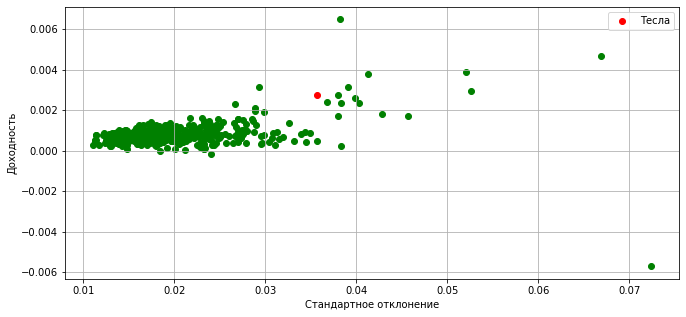

In [36]:
plt.figure(figsize=(11, 5))
df_result_new = df_result.drop('TSLA',axis=0)
df_ts = pd.DataFrame(df_result.loc['TSLA'])
plt.scatter(df_result_new['std'],df_result_new['r'],color='green')
plt.scatter(df_ts.loc['std'],df_ts.loc['r'],color='red',label = 'Тесла')
plt.grid(True)
plt.xlabel('Стандартное отклонение')
plt.ylabel('Доходность')
plt.legend()

In [37]:
df_result = STD.join(R)
df_result

,std,r
A,0.015556,0.000808
AAL,0.031476,0.000579
AAP,0.020050,0.000659
AAPL,0.017579,0.001268
ABBV,0.017331,0.000925
...,...,...
ZBRA,0.023282,0.001256
ZION,0.020683,0.000733
ZM,0.042788,0.001823
ZS,0.037999,0.002762


Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ 

__ж) [5 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [38]:
VaR = df_train.quantile(q = 0.05)*(-1)
VaR

A       0.025164
AAL     0.044087
AAP     0.026499
AAPL    0.025629
ABBV    0.024926
          ...   
ZBRA    0.030612
ZION    0.030714
ZM      0.061953
ZS      0.055926
ZTS     0.022609
Name: 0.05, Length: 520, dtype: float64

In [39]:
# добавим получившиеся значения в нашу таблицу
VaR.name = 'VaR'
df_result = df_result.join(VaR)
df_result.head()

,std,r,VaR
A,0.015556,0.000808,0.025164
AAL,0.031476,0.000579,0.044087
AAP,0.020050,0.000659,0.026499
AAPL,0.017579,0.001268,0.025629
ABBV,0.017331,0.000925,0.024926


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте $\text{VaR}.$

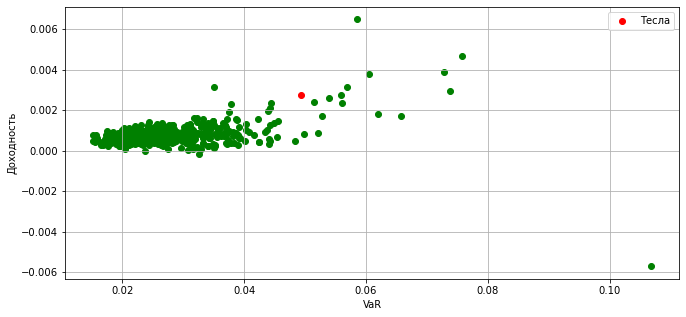

In [40]:
plt.figure(figsize=(11, 5))
df_result_n = df_result.drop('TSLA',axis=0)
df_tes = pd.DataFrame(df_result.loc['TSLA'])
plt.scatter(df_result_n['VaR'],df_result_n['r'],color='green')
plt.scatter(df_tes.loc['VaR'],df_tes.loc['r'],color='red',label = 'Тесла')
plt.grid(True)
plt.xlabel('VaR')
plt.ylabel('Доходность')
plt.legend()

$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

In [41]:
var_new = df_result['VaR']*(-1)
df_result['ES']= df_train[df_train<var_new].mean()

In [42]:
df_result['ES']=df_result['ES']*(-1)

In [43]:
df_result = df_result[['std','r','VaR','ES']].round(3)

In [44]:
#ES для Теслы
df_result.loc['TSLA'][3]*(-1)

-0.076

In [45]:
#Потеряем при вложении 1000:
print(f'{abs(1000*0.076)} $')

76.0 $


In [46]:
#Получим в 5% лучших случаев
rrt = df_train['TSLA'].quantile(0.95)
we = df_train['TSLA']>rrt
print((abs(df_train['TSLA'][we].mean()*1000)),f'$')

93.9084648765163 $


In [47]:
itog_result = df_result.sort_values(by='ES',ascending=False)

In [48]:
itog_result = itog_result.reset_index()
itog_result = itog_result.rename(columns = {'index':'Ticker'})
itog_result.head()

,Ticker,std,r,VaR,ES
0,RIVN,0.072,-0.006,0.107,0.138
1,LCID,0.067,0.005,0.076,0.125
2,ENPH,0.053,0.003,0.074,0.105
3,MRNA,0.052,0.004,0.073,0.104
4,PDD,0.046,0.002,0.066,0.092


In [49]:
itog = itog_result.to_csv('var_result.csv',index=False)

1. Отсортируйте таблицу `df_result` по колонке `ES` по убыванию
2. Запишите получившиеся результаты в таблицу с колонками `'Ticker', 'std', 'r', 'VaR', 'ES'` в файл `var_result` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми. Порядок колонок должен быть именно таким.
3. Отправьте свой файл `var_result.csv` в контест (https://contest.yandex.ru/contest/47242/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

#### никнейм: damamontova@edu.hse.ru
#### ссылочка на посылочку: https://contest.yandex.ru/contest/47242/run-report/84786981/

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__Какая метрика лучше?__

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона ["Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок."](https://disk.yandex.ru/i/ryFfPZ8_1uTO6g) Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.

## 1.3 VaR-кривая 

__з) [10 баллов]__ Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.

In [50]:
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285

На тестовой выборке мы пробили для Теслы VaR в 14% случаев вместо 5%. Это очень плохой результат. Наша оценка риска оказалась провальной. Можно с помощью теста Купика проверить значимость этих отличий, но мы пока что не будем это делать. Отложим эту историю до домашки про гипотезы.

Нарисуем VaR-кривую.

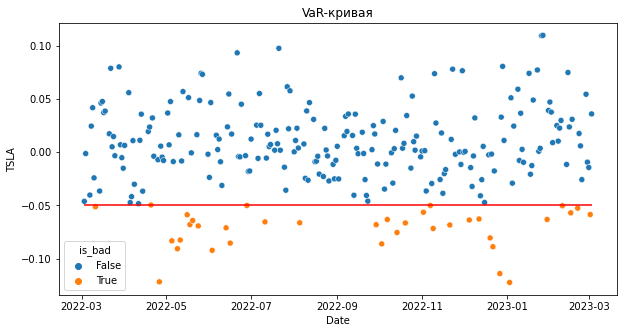

In [51]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('VaR-кривая');

А почему все это плохо? А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $\text{VaR}$ и так с ним и сидим. Давайте сделаем по-другому.

- Выделите $N$ точек (первые 4 года), найдите по ним $\text{VaR}$ для $N+1$ дня. Потом сдвинем $N$ точек вправо и найдём $\text{VaR}$ по ним для точки $N + 2$. И так далее. Тогда $\text{VaR}$ будет в каждой точке разный. 
- Нарисуйте получившуюся для Теслы кривую на картинке.
- Посчитайте как часто мы пробивали $\text{VaR}$ на практике, улучшилась ли цифра?

In [52]:
df_r_new = df_train

In [53]:
var_df = df_r_new.quantile(q = 0.05)
var_df = pd.DataFrame(var_df)
var_df = var_df.rename(columns = {0.05:df_test.index[0]})

In [54]:
for ty in range(1,len(df_test)):
    df_r_new = df_r_new.append(df_test.iloc[ty],ignore_index=True)
    df_r_new = df_r_new.drop(ty)
    var_df[df_test.index[ty]] = df_r_new.quantile(0.05)

C:\Users\user\AppData\Local\Temp/ipykernel_17572/776688154.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r_new = df_r_new.append(df_test.iloc[ty],ignore_index=True)
C:\Users\user\AppData\Local\Temp/ipykernel_17572/776688154.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r_new = df_r_new.append(df_test.iloc[ty],ignore_index=True)
C:\Users\user\AppData\Local\Temp/ipykernel_17572/776688154.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r_new = df_r_new.append(df_test.iloc[ty],ignore_index=True)
C:\Users\user\AppData\Local\Temp/ipykernel_17572/776688154.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r_new = 

In [55]:
var_tsla_new = pd.DataFrame(var_df.loc['TSLA'])
df_tsla_new = pd.DataFrame(df_test['TSLA'])
df_tsla_new['is_bad'] = (df_tsla_new.values< var_tsla_new)
df_tsla_new['is_bad'].mean()

0.1349206349206349

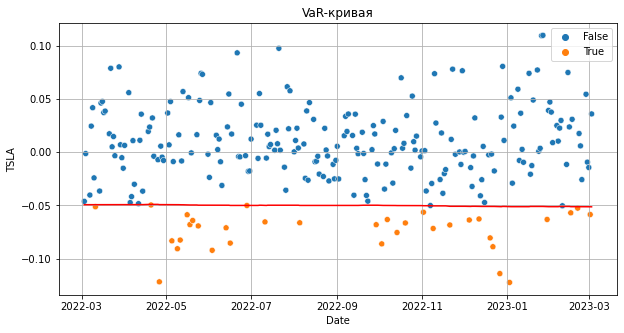

In [56]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla_new, x=df_tsla_new.index,y='TSLA', hue='is_bad')
sns.lineplot(data=df_tsla_new,x=df_tsla_new.index,y=var_tsla_new['TSLA'],color='red')
plt.title('VaR-кривая')
plt.grid(True)

Способ оценки $\text{VaR},$ который мы использовали, называется **историческим.** Кроме него есть довольно много других способов. Например:

- можно попробовать подогнать какое-то распределение под данные и взять его квантиль
- можно попробовать обучить модель машинного обучения предсказывать соотвествующий квантиль
- можно обучить какую-нибудь модель на временном ряде
- можно попробовать отдельно моделировать хвосты распределения

Часть способов более подробно можно [посмотреть в лекциях Ильи Езепова.](https://rpubs.com/iezepov) Они немного староваты, но хороши. 

__и) [бонусные 5 баллов]__

Разберитесь как работает какой-нибудь ещё метод оценки $\text{VaR}$ и реализуйте его. Сравните его работу с историческим методом на нескольких ценных бумагах из наших данных. Например, вы можете разобраться с [ОГРом](https://rpubs.com/iezepov/e502lec2) или [моделированием хвостов.](https://rpubs.com/iezepov/e502lec6) Весь код должен быть написан на питоне. Часть бонуса -- попытаться найти библиотеки для этого.

# Часть 2: чековая

За задание можно получить $50$ баллов. Мы будем работать с покупками и чеками. Смотреть за корреляциями в покупках довольно полезно.

> В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». 

>К сожалению, такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

Для работы будем использовать датасет о продуктовых корзинах: https://www.kaggle.com/heeraldedhia/groceries-dataset

- `id` - номер покупки (чека)
- `fielddate` - дата покупки
- `product` - что было куплено

In [57]:
df = pd.read_csv('groceries.csv', sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df.head()

(38765, 3)


,id,fielddate,product
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## 2.1 Разогреваемся

__а) [10 баллов]__ Сколько всего уникальных заказов было сделано?

In [58]:
r = len(df['id'].unique())
print(f'{r} уникальных заказов было сделано')

3898 уникальных заказов было сделано


Какие товары покупались чаще всего? Найдите топ-10 самых популярных товаров и изобразите частоту их покупок на столбиковой диаграмме. 

In [59]:
# Посмотрим на частоту покупки каждого товара и выведем топ-10 самых популярных
df['product'].value_counts()[:10]

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: product, dtype: int64

Text(0, 0.5, 'Количество купленного продукта')

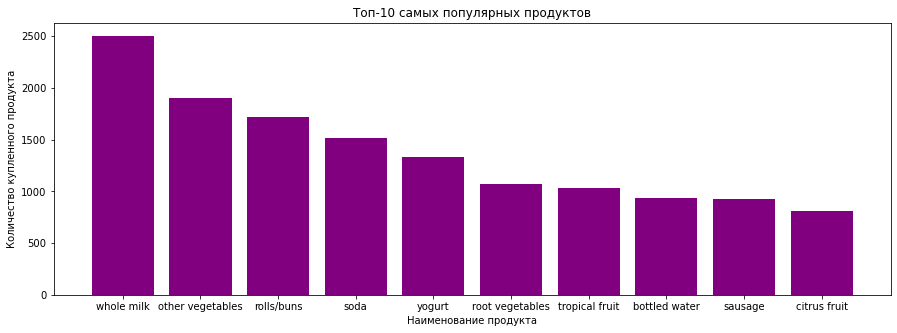

In [60]:
plt.figure(figsize=(15,5))
k = pd.DataFrame(df['product'].value_counts()[:10])
k['index'] = k.index
k.set_index('index')
plt.bar(k['index'],k['product'],color = 'purple')
plt.title('Топ-10 самых популярных продуктов')
plt.xlabel('Наименование продукта')
plt.ylabel('Количество купленного продукта')

Визуализируйте как часто покупались товары с помощью [облака слов.](https://www.python-graph-gallery.com/wordcloud/) Для графика используйте все товары из датасета. 

In [61]:
!pip install wordcloud

In [62]:
import wordcloud

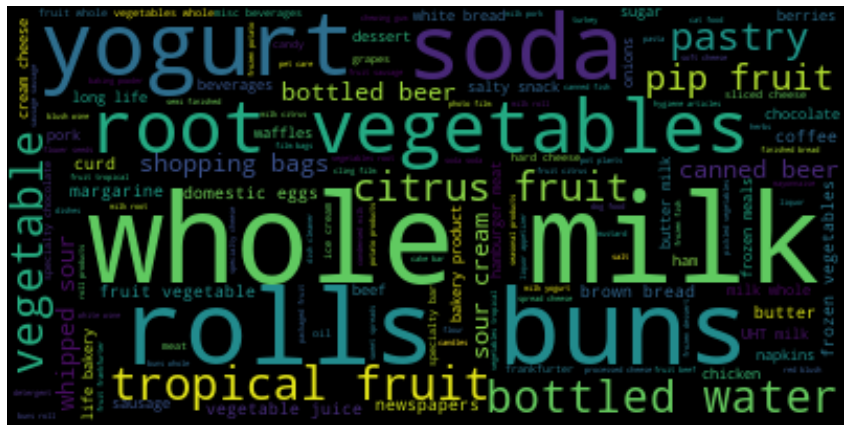

In [63]:
from wordcloud import WordCloud
text = " ".join(df['product'])
wordcloud = WordCloud().generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

__б) [10 баллов]__ Начнём анализировать совместные покупки товаров.

В таблице выше в каждой строке записана информация о покупке конкретного товара. Давайте сделаем табличку размера "число товаров" на "число покупок", чтобы понимать какие товары покупались вместе, а какие нет. 

По строкам отложите номера чеков. По столбцам отложите название продуктов. На пересечении должно стоять число товаров, купленное в этом чеке. Используйте для этого команду `pivot_table`.

In [64]:
df = df.drop('fielddate',axis=1)

In [65]:
a = df.pivot_table(index = ['id'],columns = ['product'],aggfunc = np.count_nonzero)
a = a.fillna(0)
a.head()

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0


В нашей матрице огромное число нулей. Обычно такие матрицы называют разряжеными. Мы занимаем нулями кучу свободной памяти, которую мы могли бы не занимать, если бы хранили данные [в виде разреженных матриц.](https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/) У нас данные небольшие, поэтому мы забьём на неоптимальность и продолжим работать с ними в `pandas`.

Постройте матрицу корреляций Пирсона. Визуализируйте матрицу с помошью heatmap.

In [66]:
#сама матрица
corr = a.corr(method='pearson')
corr

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
product,,,,,,,,,,,,,,,,,,,,,
Instant food products,1.000000,-0.006936,-0.009420,-0.010825,-0.003470,-0.004007,-0.010419,-0.008275,0.005847,-0.014528,...,0.025355,0.021851,0.005348,0.014025,-0.005670,0.016640,0.002853,0.015981,0.005071,0.018221
UHT-milk,-0.006936,1.000000,0.013806,0.006105,-0.007877,0.018349,0.009462,-0.018785,0.002897,0.020801,...,-0.003803,-0.024466,0.009144,0.006618,-0.012871,-0.011550,0.009990,0.028747,0.006505,0.028753
abrasive cleaner,-0.009420,0.013806,1.000000,-0.006523,-0.002091,-0.002415,-0.013429,-0.004986,0.018970,0.001813,...,0.012922,-0.008507,-0.007390,0.002163,-0.003417,0.010777,0.000107,0.003558,0.008360,-0.009420
artif. sweetener,-0.010825,0.006105,-0.006523,1.000000,0.105251,-0.002775,-0.015432,-0.005730,-0.006645,0.016042,...,0.049392,-0.009776,0.010179,-0.006614,-0.003926,-0.006806,-0.018394,0.029591,-0.024397,-0.010825
baby cosmetics,-0.003470,-0.007877,-0.002091,0.105251,1.000000,-0.000889,-0.004947,-0.001837,0.014798,-0.007983,...,-0.003919,-0.003134,-0.007413,-0.011288,-0.001259,-0.008476,-0.005896,-0.021056,-0.000410,-0.003470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white bread,0.016640,-0.011550,0.010777,-0.006806,-0.008476,-0.009789,-0.011195,0.005394,0.015850,0.030758,...,0.014921,0.001920,-0.000010,0.069757,0.004792,1.000000,0.046272,0.053497,0.030962,0.016640
white wine,0.002853,0.009990,0.000107,-0.018394,-0.005896,-0.006809,-0.010370,0.022577,0.015060,0.021670,...,-0.005083,0.028101,0.015072,0.000317,0.017039,0.046272,1.000000,0.032862,0.039600,-0.006953
whole milk,0.015981,0.028747,0.003558,0.029591,-0.021056,-0.024316,0.020192,0.032618,0.073856,0.028186,...,0.013874,-0.007158,0.069096,0.060338,0.039298,0.053497,0.032862,1.000000,0.103533,0.043075


<AxesSubplot:xlabel='product', ylabel='product'>

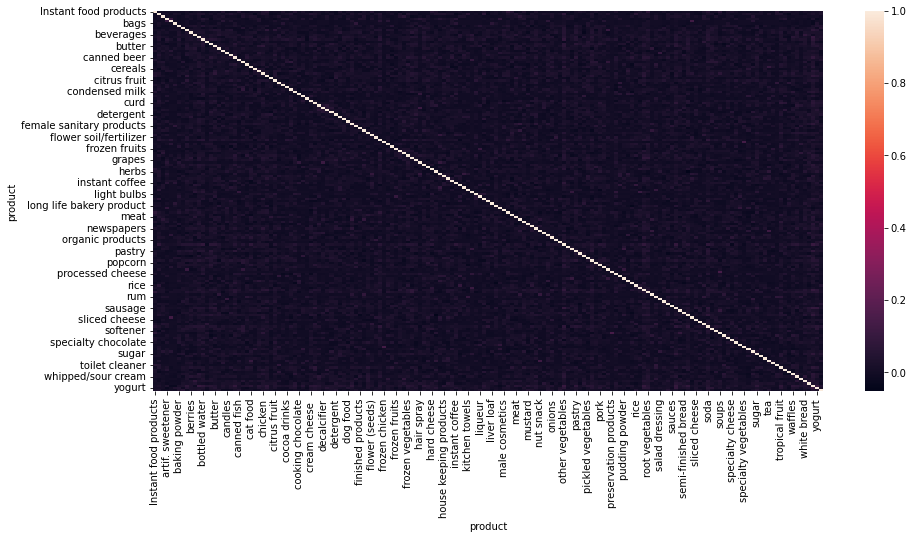

In [67]:
#визуализация матрицы
plt.figure(figsize=(15,7))
sns.heatmap(corr)

Какие продукты сильнее всего коррелируют с яйцами, `domestic eggs` (их чаще всего покупают вместе)? Какие продукты "мешают" купить яйца, то есть отрицательно коррелируют с их покупкой? 

In [68]:
corr['domestic eggs'].sort_values(ascending=False)

product
domestic eggs        1.000000
meat spreads         0.083607
whole milk           0.072512
newspapers           0.064502
rubbing alcohol      0.060533
                       ...   
cream               -0.020814
dessert             -0.021004
ready soups         -0.023280
cooking chocolate   -0.023280
pet care            -0.024206
Name: domestic eggs, Length: 167, dtype: float64

- #### Как мы, сильнее всего с яйцами(не учитываем корреляцию с самим собой, конечно) коррелируют meat spreads,whole milk,newspapers,rubbing alcohol
- #### Отрицательно коррелируют: pet care, cooking chocolate,ready soups,dessert,cream

Какие два продукта коррелируют сильнее всего? 

In [69]:
corr_for_an = corr.replace(1.000000,-1000)

In [70]:
corr_for_an.max().sort_values(ascending=False)

product
preservation products        0.143465
soups                        0.143465
frozen chicken               0.133211
specialty vegetables         0.133211
skin care                    0.127489
                               ...   
salt                         0.049714
packaged fruit/vegetables    0.048890
sweet spreads                0.047520
snack products               0.046770
pet care                     0.046628
Length: 167, dtype: float64

- #### Как мы видим, больше всего коррелирует пара "preservation products - soups"

__Вопрос:__ почему корреляция пирсона это плохой способ измерить взаимосвязть между покупками?

__Ответ:__ Потому что на самом деле корреляции оказываются нелогичными, вряд ли пары с самыми сильными корреляциями можно представить ин рил лайф. Кроме того, корреляция Пирсона может оценивать ТОЛЬКО линейную связь между двумя непрерывными переменными, какими наши покупки не являются


## 2.2 Коэффициент корреляции Мэтьюса

__Коэффициент корреляции Мэтьюса__ — это мера силы взаимосвязи между двумя бинарными переменными. Для того чтобы его вычислить, необходимо использовать таблицу сопряженности

|        |  $0$   |  $1$   |
|:------:|:------:|:------:|
| $0$    |  $a$   |  $b$   |
| $1$    |  $c$   |  $d$   |

В строках таблицы сопряжённости находятся значения одного признака, по столбцам — второго, в каждой ячейке — количество объектов, на которых реализовалась эта пара. Коэффициент корреляции Мэтьюса вычисляется по данным из таблицы сопряжённости следующим образом:

$$
MCC(X_1, X_2) = \frac{a \cdot d - b \cdot c}{\sqrt{(a + b) \cdot (a + c) \cdot (b + d) \cdot (c + d)}}
$$

Точно так же, как и коэффициенты Пирсона и Спирмена, корреляция Мэтьюса лежит в диапазоне от $−1$ до $1.$ Нулевое значение соответсвуте отсутствию взаимосвязи между переменными. Значение $MCC(X_1, X_2) = 1$ соотвествует случаю, когда $X_1$ и $X_2$ полностью совпадают, то есть $b = c = 0$. Значение  $MCC(X_1, X_2) = -1$ соответствует случаю, когда каждое значение $X_1$ отличается от каждого значения $X_2$. 

Для категориальных переменных можно также считать коэффициент V-Крамера. Подробнее можно почитать про разные корреляции [в этом конспекте.](https://disk.yandex.ru/i/Znahvyg3mIrW9A)

__в) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары коэффициент корреляции Мэтьюса. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, matthews_corrcoef`. 
5. Отсортируйте получившиеся пары по коэффициенту Мэтьюса от 1 к -1 и сохраните первые сто строк получившейся таблички в файл `result_matthews.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [71]:
from sklearn.metrics import matthews_corrcoef

In [72]:
#заменим значения, отличные от 0, на 1
a = a.replace([2,4,6,8,10,12],1)

In [73]:
#удалим те товары, которые встречаются во всех чеках меньше 10 раз
for u in a.columns.values:
    if np.sum(a[u])<10:
        a = a.drop(u,axis=1)

In [74]:
#генерируем парные комбинации
import itertools
itt = list(itertools.combinations(a.columns.values,2))

In [75]:
#записываю в списки продукты из получившихся комбинаций
product_1 = []
product_2 = []
for el in itt:
    product_1.append(el[0])
    product_2.append(el[1])

In [76]:
#преобразовываем в датафрейм
product_1 = pd.DataFrame(product_1)
product_1 = product_1.rename(columns = {0:'product_1'})
product_2 = pd.DataFrame(product_2)
product_2 = product_2.rename(columns = {0:'product_2'})


In [77]:
#считаем коэффициент корреляции Мэтьюса
mc = []
for w in itt:
    cp = w[0]
    ee = w[1]
    corr_coef = matthews_corrcoef(a[cp],a[ee])
    mc.append(corr_coef)

In [78]:
#преобразовываем в датафрейм
mc = pd.DataFrame(mc)
mc = mc.rename(columns = {0:'matthews_corrcoef'})

In [79]:
#джойним_1
res = product_1.join(product_2)

In [80]:
#джойним_2
result_m = res.join(mc)
result_m.head()

,product_1,product_2,matthews_corrcoef
0,Instant food products,UHT-milk,-0.005502
1,Instant food products,abrasive cleaner,-0.009420
2,Instant food products,artif. sweetener,-0.010825
3,Instant food products,baking powder,-0.010363
4,Instant food products,bathroom cleaner,-0.008275


In [81]:
#сортируем по убыванию корреляции
result_m = result_m.sort_values(by='matthews_corrcoef',ascending=False)

In [82]:
#записываем в csv файл
resss = result_m.head(100).to_csv('result_mat.csv',index=False)

#### никнейм: damamontova@edu.hse.ru 
#### ссылочка на посылочку: https://contest.yandex.ru/contest/47242/run-report/84800755/

Отправьте свой файл `result_mat.csv` в контест (https://contest.yandex.ru/contest/47242/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

## 2.3 Независимость событий

 Конечно же, корреляция — это [не единственный способ искать](https://habr.com/ru/company/ods/blog/353502/) между покупками ассоциативные правила. Давайе попробуем другой подход.

Мы знаем, что события $A$ и $B$ называются независимыми, если $P(AB) = P(A)\cdot P(B)$. Отталкиваясь от этого определения, можно ввести другую характеристику, которая показывает, насколько продукты зависят друг от друга, а именно __поддержку (lift).__ 

$$
lift = \frac{P(AB)}{P(A)\cdot P(B)}
$$

Эта метрика описывает отношение зависимости товаров к их независимости. Если оказалось, что `lift = 1`, это означает, что покупка товара $A$ не зависит от покупки товара $B$. Если `lift > 1`, то это означает, что вероятность встретить оба товара в чеке, $P(AB)$ высокая, то есть товары покупают вместе. Если `lift < 1`, это означает, что товары, наоборот, очень часто покупают по-отдельности. 

__г) [5 баллов]__ Посчитайте значение нашей метрики для яиц и молока (`'whole milk', 'domestic eggs'`).

> Вам аккуратно нужно сделать три среза по условию  `>= 1`. Там, где пара надо делать срез так, чтобы оба товара дали `True`. Сделать это в одну строку вам поможет метод `.all(axis=1)`. Частоты можно получить методом `.mean()`, так как python думает, что `False` - это ноль, а `True` - это единица.

In [83]:
pr_milk = a['whole milk'].mean()
pr_eggs = a['domestic eggs'].mean()
pr_total = a[['whole milk','domestic eggs']].all(axis=1).mean()

In [84]:
lift_me = pr_total/(pr_milk*pr_eggs)

In [85]:
lift_me

1.152241691425711

- #### Значение lift >1, значит, товары в основном покупают вместе

__д) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары значение поддержки, `lift`. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, lift`. 
5. Отсортируйте получившиеся пары по значению lift от больших к меньшим и сохраните первые сто строк получившейся таблички в файл `result_lift.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [86]:
import itertools
forl = list(itertools.combinations(a.columns.values,2))

In [87]:
product_1_l = []
product_2_l = []
for kop in forl:
    product_1_l.append(kop[0])
    product_2_l.append(kop[1])

In [88]:
product_1_l = pd.DataFrame(product_1_l)
product_1_l = product_1_l.rename(columns = {0:'product_1'})
product_2_l = pd.DataFrame(product_2_l)
product_2_l = product_2_l.rename(columns = {0:'product_2'})


In [89]:
#считаем всякие lift
coefff = []
for err in forl:
    ok = err[0]
    neok = err[1]
    prob_1 = a[ok].mean()
    prob_2 = a[neok].mean()
    prob_ttl = a[[ok,neok]].all(axis=1).mean()
    lift_coef = prob_ttl/(prob_1*prob_2)
    coefff.append(lift_coef)

In [90]:
#преобразовываем в датафрейм
coefff = pd.DataFrame(coefff)
coefff = coefff.rename(columns = {0:'lift'})

In [91]:
pred_res = product_1_l.join(product_2_l)

In [92]:
result_l = pred_res.join(coefff)
result_l.head()

,product_1,product_2,lift
0,Instant food products,UHT-milk,0.849237
1,Instant food products,abrasive cleaner,0.000000
2,Instant food products,artif. sweetener,0.000000
3,Instant food products,baking powder,0.536915
4,Instant food products,bathroom cleaner,0.000000


In [93]:
result_lift = result_l.sort_values(by='lift',ascending=False)
result_lift.head()

,product_1,product_2,lift
6669,flower soil/fertilizer,organic products,24.362500
7995,honey,ready soups,19.989744
9689,nut snack,tea,19.686869
7958,honey,ketchup,18.740385
4715,cooking chocolate,ready soups,17.324444


In [94]:
result_ll = result_lift.head(100).to_csv('result_lift.csv',index=False)

#### никнейм: damamontova@edu.hse.ru 
#### ссылочка на посылочку: https://contest.yandex.ru/contest/47242/run-report/84804597/

Отправьте свой файл `result_lift.csv` в контест (https://contest.yandex.ru/contest/47242/problems/C/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__е) [5 баллов]__ Давайте проинтепретируем результаты.

- Посмотрите на 10 пар продуктов с самой высокой корреляцией Мэтьюса и на 10 пар с самой низкой. Проинтерпретируйте, насколько эта корреляция логична? Придумайте ситуации, когда какие-то из пар могли бы покупаться вместе.
- Посмотрите на 10 пар продкутов с самым высоким lift, насколько логично они выделились? 
- Насколько большим оказалось пересечение двух методов? Как думаете, почему? А если взять первые сто пар?

__Ответы:__  Я написала ответы под каждым отдельно

In [95]:
#выведем 10 пар с самой высокой корреляцией Мэтьюса:
result_m.head(10)

,product_1,product_2,matthews_corrcoef
9689,nut snack,tea,0.117578
6542,flower (seeds),honey,0.095058
11218,sausage,yogurt,0.094040
7958,honey,ketchup,0.093365
11778,whole milk,yogurt,0.093302
8582,kitchen towels,rum,0.089588
8417,jam,rice,0.088470
2954,canned fruit,potato products,0.088020
3254,cat food,tea,0.087834
6354,fish,meat spreads,0.086703


In [96]:
#а теперь 10 с самой низкой корреляцией Мэтьюса
result_m.tail(10)

,product_1,product_2,matthews_corrcoef
10431,pip fruit,soups,-0.032088
8725,liquor,pip fruit,-0.032196
10845,red/blush wine,semi-finished bread,-0.032391
8138,hygiene articles,mayonnaise,-0.032691
9227,meat,mustard,-0.033340
10259,pet care,salty snack,-0.033813
8570,kitchen towels,pork,-0.034400
1141,berries,photo/film,-0.034996
8962,long life bakery product,red/blush wine,-0.037910
7921,herbs,shopping bags,-0.052079


#### На самом деле, выводы из пар с высокой корреляцией, и вывод из пар с низкой корреляцией одинаковы. Корреляция не особо логична в обоих случаях. Конечно, когда мы говорим о низких значениях, действительно трудно представить пару "hygiene articles - mayonnaise". Тем не менее, для высоких значений пары тоже выглядят мало логичными, например, такие как "sausage - yogurt" или "cat food - tea".
#### Могут быть ситуации, когда пары могли бы покупаться вместе. Например, такая как "kitchen towels -	rum". Наверняка предусмотрительные люди трезво(на момент времени покупки) оценивают своё состояние после рома, поэтому купить кухонные полотенца разумно, если силы в руках не будет и бокал с веселительным напитком прольётся.

In [97]:
#выведем 10 пар с самым высоким показателем lift:
result_lift.head(10)

,product_1,product_2,lift
6669,flower soil/fertilizer,organic products,24.362500
7995,honey,ready soups,19.989744
9689,nut snack,tea,19.686869
7958,honey,ketchup,18.740385
4715,cooking chocolate,ready soups,17.324444
2954,canned fruit,potato products,16.874459
7114,frozen fruits,tidbits,16.107438
7993,honey,prosecco,15.781377
8009,honey,skin care,14.992308
4713,cooking chocolate,prosecco,13.677193


In [98]:
#выведем 10 пар с самым низким показателем lift:
result_lift.tail(10)

,product_1,product_2,lift
9739,nuts/prunes,soft cheese,0.0
9740,nuts/prunes,softener,0.0
9741,nuts/prunes,soups,0.0
9742,nuts/prunes,sparkling wine,0.0
9744,nuts/prunes,specialty cheese,0.0
6182,female sanitary products,seasonal products,0.0
9746,nuts/prunes,specialty fat,0.0
9747,nuts/prunes,specialty vegetables,0.0
9748,nuts/prunes,spices,0.0
3882,chocolate marshmallow,soups,0.0


#### Здесь уже, на самом деле, присутствует доля логики как, например, для пары "frozen fruits - tidbits" или "nut snack - tea" для высоких показателей. Так и для низких показателей, например пара "chocolate marshmallow - soups".
#### Тем не менее нельзя сказать, что большинство пар прям сильно логичнее или вообще логично в принципе

- #### Пересечение методов очень мало, это можно видеть из нескольких совпадающих пар в самых высоких значениях. Получилось так, потому что это две разные метрики. Коэффициент Мэтьса о взаимосвязи пары переменных, а lift - об отношении их зависимости к независимости.Если мы возьмем около 100 пар, то картина будет получше, поскольку 10 пар -  всё-таки слишком маленькая выборка, чтобы рассуждать о пересечении результатов работы этих метрик

__ё) [бонусные 5 баллов]__ 

Иногда в чеках пытаются искать __продукты-якоря.__ То есть продукты, которые являются основными. Например: айфон - основной продукт, наушники и чехол - дополнения к нему. Предложите алгоритм поиска таких товаров, похожий на то, что мы делали выше. Реализуйте алгоритм поиска якорей, который вы придумали. 

__Ответ:__ ваш текст
